In [28]:
import pandas as pd #biblioteca pandas - analise de dados
import matplotlib.pyplot as plt #biblioteca de graficos
from statsmodels.tsa.seasonal import seasonal_decompose #Time Series Analysis


In [29]:
#variável eel (tabela est_est_log)do tipo dataframe que serve para ler o arquivo csv que é a tabela est_est_log 
eel = pd.read_csv('../tabelas_test/est_est_log_2019-06-18.csv').set_index('id') 
#função que demonstra apenas as primeiras 5 instancias dessa tabela.
eel.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
1,1408122540,Giovanny,Swiss A,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
2,1408122540,Giovanny,Swiss A,2,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
3,1408122540,Giovanny,Swiss B,3,m,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
4,1408122540,Giovanny,Swiss B,3,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA
5,1408122540,Giovanny,Swiss B,4,f,1402372800,inser,inser,666,666,...,666,666,666,666,666,666,666,666,AAA,AAA


In [30]:
#variável do tipo dataframe utilizando a função query que serve como um filtro pendindo apenas a coluna "util" com numero de nascidos inferior a 200.
num_sex = eel.query("util == 'nasc' & num_nasc < 200")

#lista com nome das colunas referentes a datas
datas = ['date_hoje', 'date_nasc', 'data_inicio', 'date_acas', 'date_nasc_acas', 'date_sex', 'data_solic', 'data_forn', 'data_fim']

#laço que em c percorre em datas e padronizando tudo em formato de data pela função to_datetime
for c in datas:
    num_sex[c] = pd.to_datetime(num_sex[c], unit = 's') #indica o formato das datas
    
num_sex.head() 

/home/eloiza/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [34]:
#'Test', 'AAA', 'Swiss', 'C57BL06WT\t', 'Swiss/CFW B', 'Swiss/CFW D','Swiss/CFW A','Swiss/CFW C', 'Swiss/CFW', 'Swiss-2', 'Swiss-2 A ', 'NZB/BINJ','NZW/LacJ','NOD / SHILTJ')

tirar_ling = num_sex.query("ling != 'Swiss'").query("ling != 'C57BL06WT\t'").query("ling != 'Swiss/CFW B'"). query("ling != 'Swiss/CFW D'").query("ling != 'Swiss/CFW A'").query("ling != 'Swiss/CFW C'"). query("ling != 'Swiss/CFW'").query("ling != 'Swiss-2'").query("ling != 'Swiss-2 A '").query("ling != 'NZB/BINJ'").query("ling != 'NZW/LacJ'").query("ling !='NOD / SHILTJ'").query("ling != 'Test'")
tirar_ling['ling'].drop_duplicates().sort_values()
#tirar_ling.info()

id
3447        S129KO
2720        S129WT
2921      129/SV-E
10745        AG129
499         Balb/c
2928           C3H
2953       C57BL/6
513      C57BL06WT
17460       DBA/1J
381         S129KO
374         S129WT
603        Swiss A
123        Swiss B
118        Swiss C
122        Swiss D
116        Swiss E
4956     Swiss-1 A
4246     Swiss-1 B
4952     Swiss-1 C
5020     Swiss-1 D
4901     Swiss-1 E
4263     Swiss-2 A
4368     Swiss-2 B
4396     Swiss-2 C
4398     Swiss-2 D
4370     Swiss-2 E
Name: ling, dtype: object

In [36]:
# tirar_ling = num_sex.query("ling != 'Swiss'").query("ling != 'C57BL06WT\t'").query("ling != 'Swiss/CFW B'"). query("ling != 'Swiss/CFW D'").query("ling != 'Swiss/CFW A'").query("ling != 'Swiss/CFW C'"). query("ling != 'Swiss/CFW'").query("ling != 'Swiss-2'").query("ling != 'Swiss-2 A '").query("ling != 'NZB/BINJ'").query("ling != 'NZW/LacJ'").query("ling !='NOD / SHILTJ'").query("ling != 'Test'")

ling_ex = ['Test', 'AAA', 'Swiss', 'C57BL06WT\t', 'Swiss/CFW B', 'Swiss/CFW D','Swiss/CFW A', 'Swiss/CFW C', 'Swiss/CFW', 'Swiss-2', 'Swiss-2 A ', 'NZB/BINJ','NZW/LacJ','NOD / SHILTJ']
    
for l in ling_ex:
    tirar_ling = num_sex.query("ling != ' + l + '")
tirar_ling.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [37]:
conc_lin = pd.DataFrame(tirar_ling['ling']) #criação da DataFrame "tirar_ling com a coluna de data"
conc_lin['num_nasc'] = tirar_ling['num_nasc']#criação de coluna(serie_temp) que estará inserida na DataFrame
conc_lin = conc_lin.set_index('ling')
conc_lin.head()

,num_nasc
ling,
Swiss E,5
Swiss E,10
Swiss C,20
Swiss E,10
Swiss E,20


In [38]:
a = 'S129WT'
b = ' S129WT'
c = '129/SV-E'

ling_sve = conc_lin.loc[[a, b, c]].sum() #soma as intancias entre as linhagens que quero concatenar
conc_lin.at[c, conc_lin.columns] = ling_sve
conc_lin.drop([a,b], inplace=True)
ling_sve

num_nasc    905
dtype: int64

In [39]:
a = 'S129KO'
b = ' S129KO'

ling_ko = conc_lin.loc[[a, b]].sum() #soma as intancias entre as linhagens que quero concatenar
conc_lin.at[a , conc_lin.columns] = ling_ko #linhagem que quer manter
conc_lin.drop([b], inplace=True) #linhagem que quer excluir
ling_ko

num_nasc    1612.0
dtype: float64

In [51]:
#Criação de DataFrame para geração de gráfico para séries temporais:

serie_temp = pd.DataFrame(tirar_ling['date_hoje']) #criação da DataFrame "tirar_ling com a coluna de data"
serie_temp['num_nasc'] = tirar_ling['num_nasc']#criação de coluna(serie_temp) que estará inserida na DataFrame
serie_temp = serie_temp.set_index('date_hoje') #identificando a nova coluna como index data_hoje

serie_temp.head()
#type(serie_temp)

,num_nasc
date_hoje,
2014-09-23 17:40:33,5
2014-09-23 17:40:33,10
2014-09-23 17:40:33,20
2014-09-23 17:40:47,10
2014-09-23 17:40:47,20


In [41]:
tirar_ling['date_hoje'].iloc[-1].year

2019

Text(0, 0.5, 'Soma de animais')

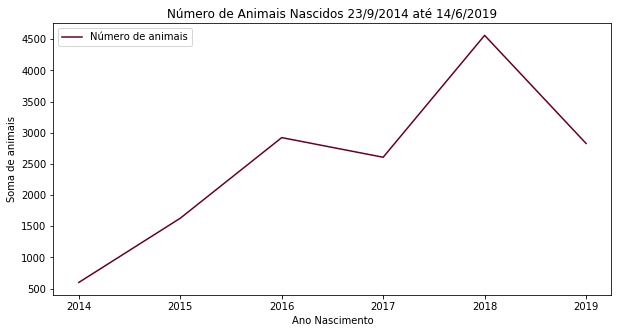

In [42]:
inic = tirar_ling.loc[tirar_ling.index.min(), "date_hoje"] #loc: localizador - localizando a primeira data
fim = tirar_ling.loc[tirar_ling.index.max(), "date_hoje"]


tsAno = serie_temp.resample('A').sum() #resample('A') agrupamento por ano, sum() somando os dados

tsAno.plot(
    figsize=(10, 5),
        colormap='RdBu',
        title=f'Número de Animais Nascidos {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)
plt.legend(['Número de animais'])
plt.xlabel('Ano Nascimento')
plt.ylabel('Soma de animais')

In [43]:
l = list(map(lambda x: x+1, tirar_ling['num_nasc']))
# l[:10]
tirar_ling.head()

,date_hoje,user,ling,num_ani,m_f,date_nasc,id_orig,util,id_solic,data_inicio,...,date_acas,date_nasc_acas,num_nasc,date_sex,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim,obs_desc,grupos_acas
id,,,,,,,,,,,,,,,,,,,,,
116,2014-09-23 17:40:33,Tania,Swiss E,5,AAA,1970-01-01 00:11:06,54,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:33,5,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
117,2014-09-23 17:40:33,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,56,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:33,10,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
118,2014-09-23 17:40:33,Tania,Swiss C,20,AAA,1970-01-01 00:11:06,62,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:46:07,2014-09-23 17:40:33,20,2014-10-14 17:40:33,666,666,666,666,AAA,AAA
119,2014-09-23 17:40:47,Tania,Swiss E,10,AAA,1970-01-01 00:11:06,116,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:06:07,2014-09-23 17:40:47,10,2014-10-14 17:40:47,666,666,666,666,AAA,AAA
120,2014-09-23 17:40:47,Tania,Swiss E,20,AAA,1970-01-01 00:11:06,117,nasc,666,1970-01-01 00:11:06,...,2014-08-26 17:14:19,2014-09-23 17:40:47,20,2014-10-14 17:40:47,666,666,666,666,AAA,AAA


In [44]:
serie_temp.head()

,num_nasc
date_hoje,
2014-09-23 17:40:33,5
2014-09-23 17:40:33,10
2014-09-23 17:40:33,20
2014-09-23 17:40:47,10
2014-09-23 17:40:47,20


In [46]:
g = tirar_ling.groupby('ling').mean()
g.head()

,num_ani,id_solic,total_time,doses,num_m,num_f,num_nasc,num_sex_m,num_sex_f,num_ani_ini,num_ani_fim
ling,,,,,,,,,,,
S129KO,5.333333,666.0,666.0,666.0,1.0,1.333333,5.333333,666.000000,223.333333,666.0,666.0
S129WT,10.000000,666.0,666.0,666.0,1.0,1.833333,10.000000,445.333333,666.000000,666.0,666.0
129/SV-E,5.294118,666.0,666.0,666.0,1.0,1.078431,5.294118,536.078431,451.284314,666.0,666.0
AG129,4.777778,666.0,666.0,666.0,1.0,1.000000,4.777778,592.444444,444.777778,666.0,666.0
Balb/c,8.612450,666.0,666.0,666.0,1.0,1.610442,8.612450,514.202811,475.698795,666.0,666.0


Text(0, 0.5, 'Soma Nascidos')

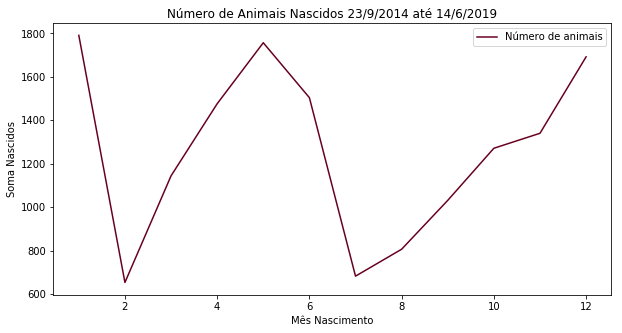

In [47]:
tsMes = serie_temp.groupby([lambda x: x.month]).sum() # agrupamento por mes
tsMes.plot(
        figsize=(10, 5),
        colormap='RdBu',
        title=f'Número de Animais Nascidos {inic.day}/{inic.month}/{inic.year} até {fim.day}/{fim.month}/{fim.year}'
)
plt.legend(['Número de animais']) #legenda
plt.xlabel('Mês Nascimento') #identificação eixo x
plt.ylabel('Soma Nascidos')

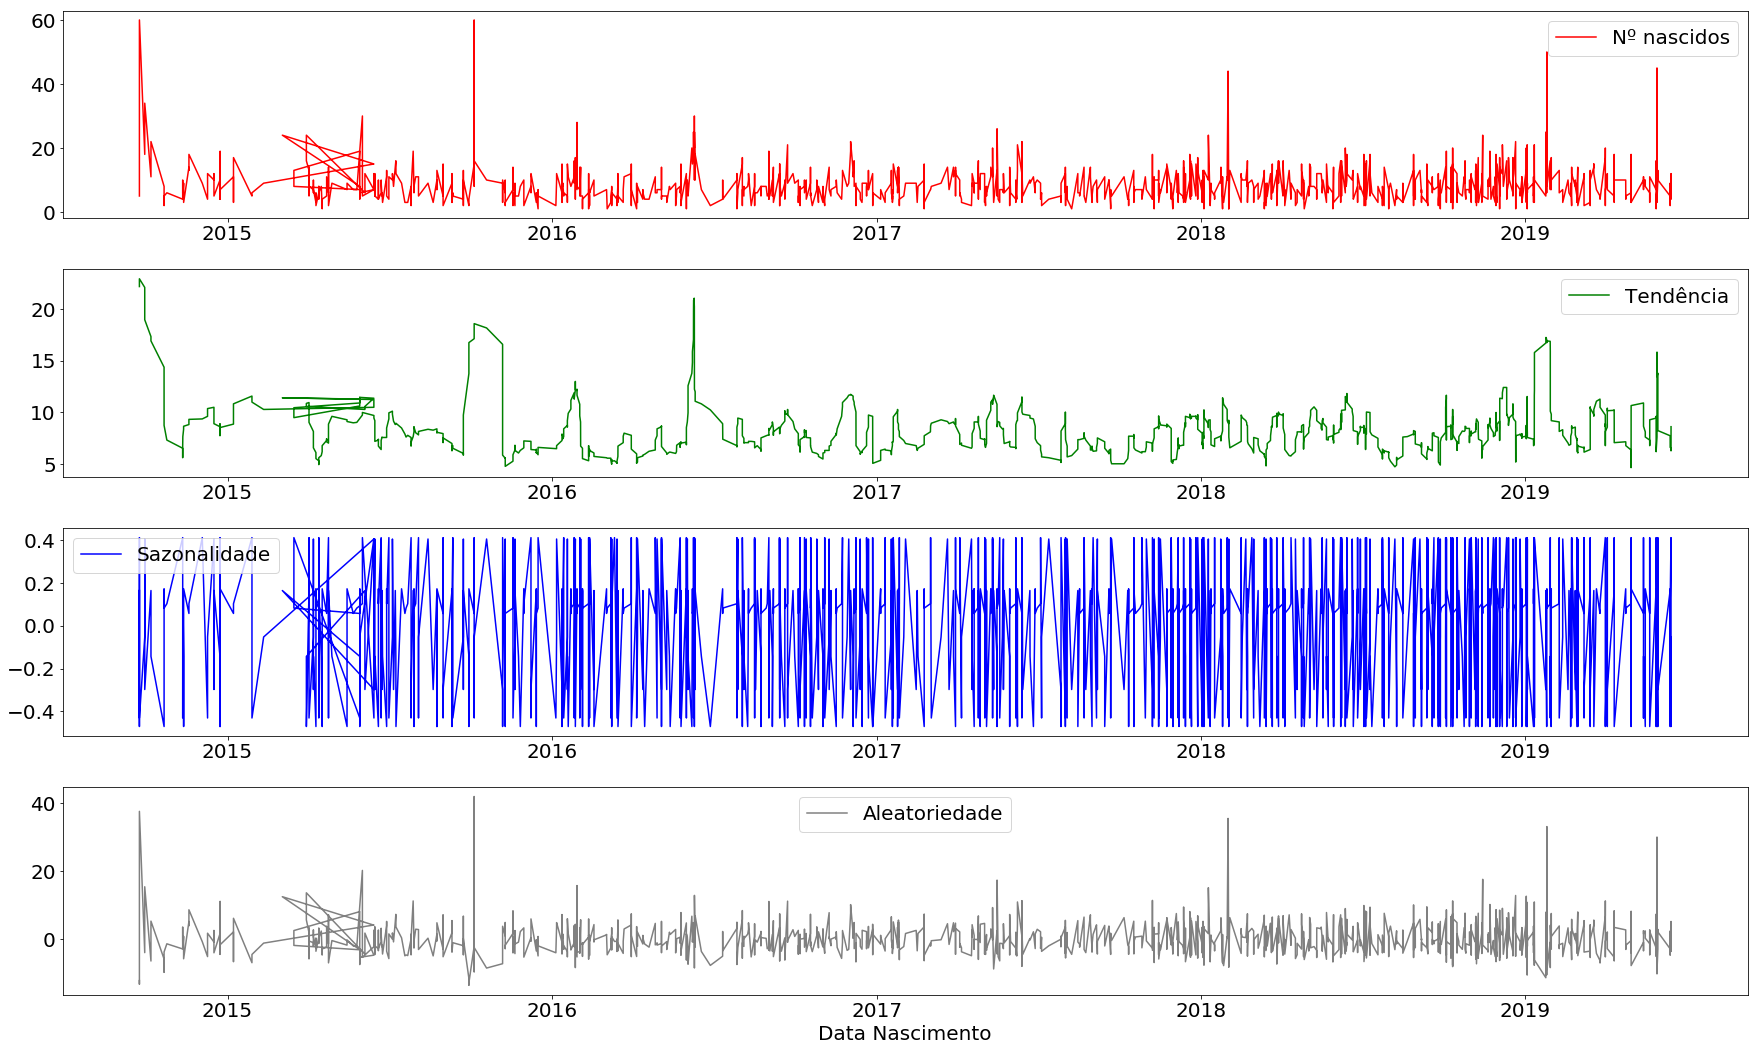

In [48]:
#Variáveis criadas para plotagem de gráfico de Série Temporal
ser_temp = serie_temp['num_nasc']
decom = seasonal_decompose(ser_temp, freq=12)

#Plotagem de gráfico ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
plt.figure(figsize=(25, 15))
plt.title('Decomposição da Série Temporal Nascimento de Animais') 
plt.legend(['Decomposição da Série Temporal Nascimento de Animais'])


plt.rcParams.update({'font.size': 20})
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20


plt.subplot(4, 1, 1)
plt.plot(ser_temp, label = 'Nº nascidos', color='red')
plt.legend(loc = 'best')

plt.subplot(4, 1, 2)
plt.plot(decom.trend, label = 'Tendência', color='green')
plt.legend(loc = 'best')

plt.subplot(4, 1, 3)
plt.plot(decom.seasonal, label = 'Sazonalidade', color='blue')
plt.legend(loc = 'best')

plt.subplot(4, 1, 4)
plt.plot(decom.resid, label = 'Aleatoriedade', color='grey')
plt.legend(loc = 'best')

plt.xlabel('Data Nascimento')
plt.tight_layout()


In [49]:
decom.observed

date_hoje
2014-09-23 17:40:33     5
2014-09-23 17:40:33    10
2014-09-23 17:40:33    20
2014-09-23 17:40:47    10
2014-09-23 17:40:47    20
2014-09-23 17:40:47    40
2014-09-23 18:13:24    10
2014-09-23 18:13:24    10
2014-09-23 18:13:25    60
2014-09-29 18:09:49    18
2014-09-29 18:10:03    26
2014-09-29 18:10:21    34
2014-10-06 18:11:54    11
2014-10-06 18:12:08    22
2014-10-21 12:43:17     8
2014-10-21 12:43:17     2
2014-10-21 12:43:17     4
2014-10-21 13:02:34     5
2014-10-24 15:47:48     6
2014-11-11 11:50:50     4
2014-11-11 11:50:50     5
2014-11-11 11:51:07     8
2014-11-11 11:51:07    10
2014-11-11 12:25:07     6
2014-11-11 15:44:47     5
2014-11-12 12:45:03     9
2014-11-12 12:45:04     3
2014-11-12 13:08:54     3
2014-11-18 12:17:18    14
2014-11-18 12:18:56    13
                       ..
2019-05-30 17:42:27    10
2019-05-30 17:43:18    10
2019-05-30 17:43:19    10
2019-05-30 17:43:19    10
2019-05-30 17:43:19    10
2019-05-30 17:43:19    10
2019-05-30 17:43:19    10
20